# Chest Clinic

In [9]:
import pandas as pd
import numpy as np

path1k = r"../sample generator/amostras1000.csv"; 
path10k = r"../sample generator/amostras10000.txt"; 

df_chest1k = pd.read_csv('amostras1000.csv', header=None)
df_chest1k.columns = ['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 
'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 
'Dispneia']
df_chest10k = pd.read_csv('amostras10000.txt', header=None)
df_chest10k.columns = ['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 
'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 
'Dispneia']

### Separação em conjunto de treinamento (70% da base) e teste (30% da base)

In [10]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#X = Variables | Y = Class
X1k, y1k = df_chest1k.iloc[:, :].values, df_chest1k.iloc[:, 0].values
X1k_train, X1k_test, y1k_train, y1k_test = \
        train_test_split(X1k, y1k, test_size=0.3, random_state=0)

X10k, y10k = df_chest10k.iloc[:, :].values, df_chest10k.iloc[:, 0].values
X10k_train, X10k_test, y10k_train, y10k_test = \
        train_test_split(X10k, y10k, test_size=0.3, random_state=0)

# <i>Random Forests</i>

 1) Visita Asia                    0.985782
 2) Tuberculose                    0.003847
 3) Fuma                           0.002180
 4) Dispneia                       0.002014
 5) Cancer Pulmao                  0.001880
 6) Bronquite                      0.001696
 7) RaioX                          0.001590
 8) Tuberculose ou Cancer          0.001011


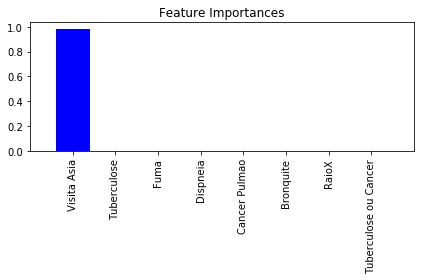

In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feat_labels = df_chest1k.columns

forest = RandomForestClassifier(n_estimators=10000,
                                criterion='entropy',
                                max_features='sqrt',
                                random_state=0,
                                n_jobs=-1)

forest.fit(X10k_train, y10k_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X10k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X10k_train.shape[1]), 
        importances[indices],
        color='blue', 
        align='center')

plt.xticks(range(X10k_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X10k_train.shape[1]])
plt.tight_layout()
plt.show()

 1) Visita Asia                    0.982010
 2) Tuberculose                    0.005789
 3) Dispneia                       0.004927
 4) Cancer Pulmao                  0.003069
 5) Fuma                           0.001547
 6) Tuberculose ou Cancer          0.001153
 7) Bronquite                      0.000789
 8) RaioX                          0.000718


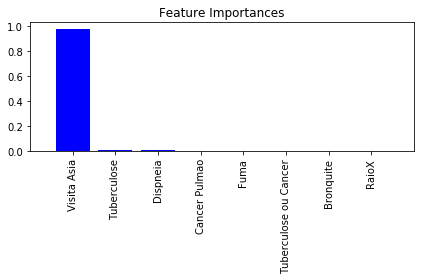

In [12]:
import graphviz
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                max_features='sqrt',
                                random_state=0)
clf1k = clf.fit(X1k_train, y1k_train)
clf10k = clf.fit(X10k_train, y10k_train)
importancesTree = clf10k.feature_importances_
indices = np.argsort(importancesTree)[::-1]
for f in range(X10k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importancesTree[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X10k_train.shape[1]), 
        importancesTree[indices],
        color='blue', 
        align='center')

plt.xticks(range(X10k_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X10k_train.shape[1]])
plt.tight_layout()
plt.show()

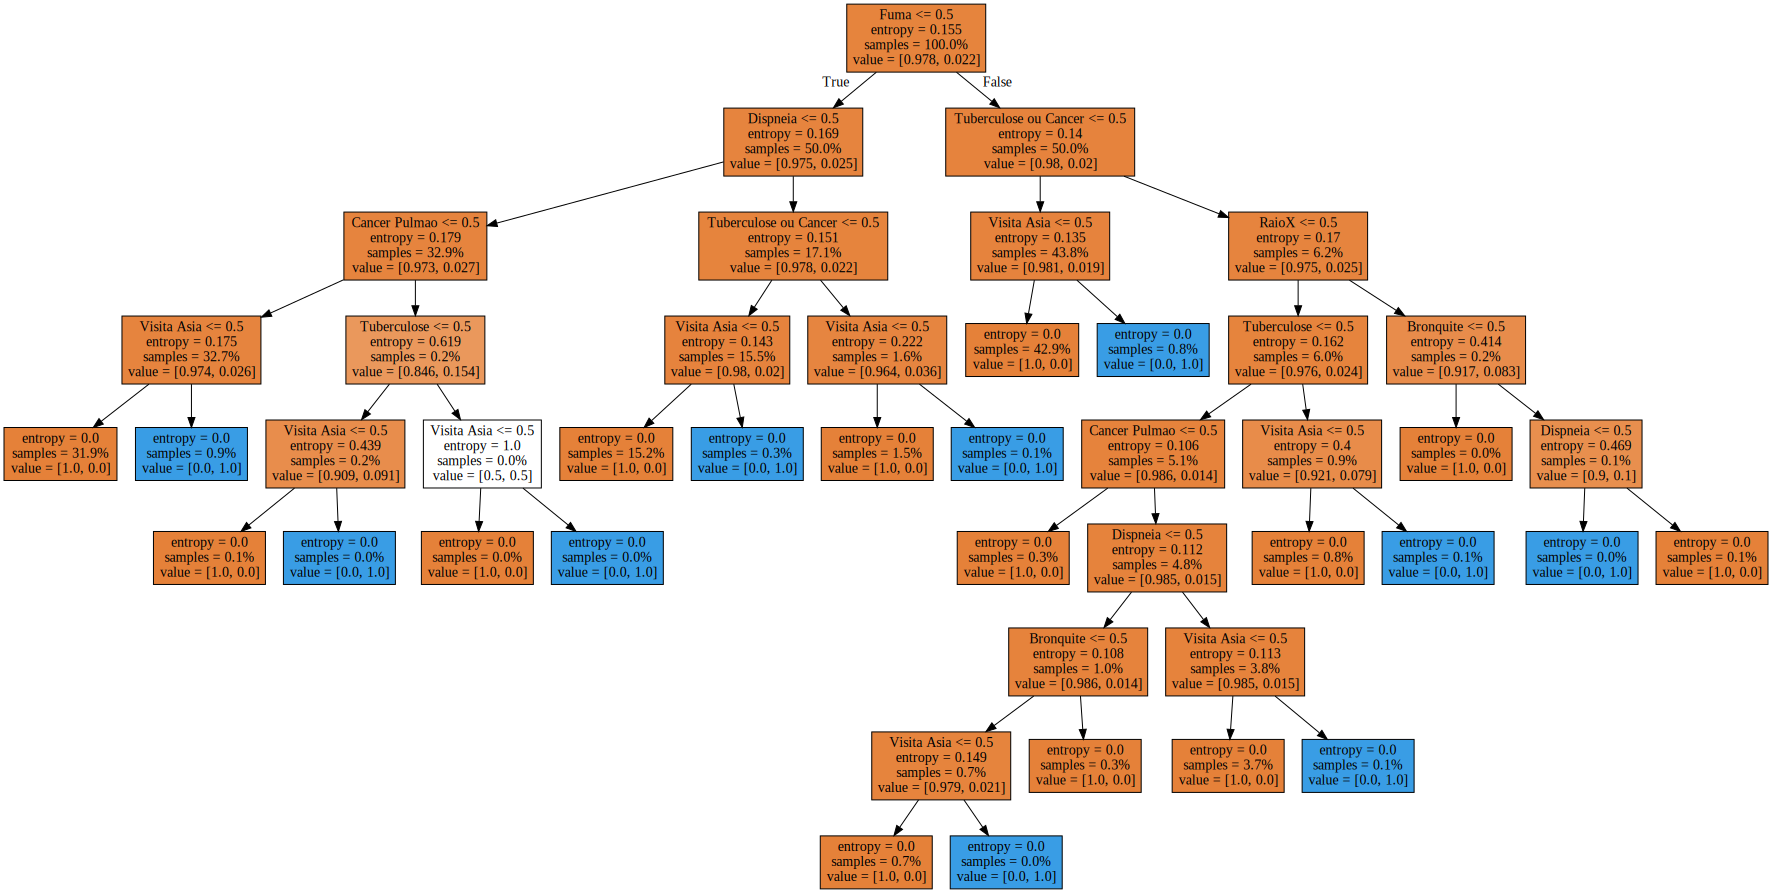

In [13]:
dot_data1k = tree.export_graphviz(clf1k, proportion=True, feature_names=['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 'Dispneia'], out_file= None, filled = True) 
dot_data10k = tree.export_graphviz(clf10k, proportion=True, feature_names=['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 'Dispneia'], out_file= None, filled = True) 

graph1k = graphviz.Source(dot_data1k)
graph10k= graphviz.Source(dot_data10k)
graph1k.render('tree1k')
graph10k.render('tree10k')
graph1k
graph10k
